In [18]:
import random
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from numpy.linalg import *
np.random.seed(42)  # don't change this line

In [19]:
class LinearRegression:

    """
    Linear Regression

    Parameters
    ----------
    alpha: float, default=0.01
        Learning rate
    tol : float, default=0.0001
        Tolerance for stopping criteria
    max_iter : int, default=10000
        Maximum number of iterations of gradient descent
    theta_init: None (or) numpy.ndarray of shape (D + 1,)
        The initial weights; if None, all weights will be zero by default
    penalty : string, default = None
        The type of regularization. The other acceptable options are l1 and l2
    lambd : float, default = 1.0
        The parameter regularisation constant (i.e. lambda)

    Attributes
    ----------
    theta_ : numpy.ndarray of shape (D + 1,)
        The value of the coefficients after gradient descent has converged
        or the number of iterations hit the maximum limit
    hist_theta_ : numpy.ndarray of shape (num_iter, D + 1) where num_iter is the number of gradient descent iterations
        Stores theta_ after every gradient descent iteration
    hist_cost_ : numpy.ndarray of shape (num_iter,) where num_iter is the number of gradient descent iterations
        Stores cost after every gradient descent iteration
    """

    def __init__(self, alpha = 0.01, tol=1e-4, max_iter = 100, theta_init = None, penalty = None, lambd = 0):

        # store meta-data
        self.alpha = alpha
        self.theta_init = theta_init
        self.max_iter = max_iter
        self.tol = tol
        self.penalty = penalty
        self.lambd = lambd

        self.theta_ = None
        self.hist_cost_ = None
        self.hist_theta_ = None

    def compute_cost(self, theta, X, y):

        """
        Compute the cost/objective function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        cost: float
            The cost as a scalar value
        """

        # TODO STARTS: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)
        n = len(y)
        predictions = X.dot(theta)
        mse_loss = (1 / n) * np.sum((predictions - y) ** 2)

        reg_loss = 0
        if self.penalty == "l1":
            reg_loss = self.lambd * np.sum(np.abs(theta[1:]))
        elif self.penalty == "l2":
            reg_loss = self.lambd * np.sum(theta[1:] ** 2)
        
        return mse_loss + reg_loss
        # TODO ENDS

    def compute_gradient(self, theta, X, y):

        """
        Compute the gradient of the cost function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        gradient: numpy.ndarray of shape (D + 1,)
            The gradient values
        """

        # TODO STARTS: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)
        n = len(y)
        predictions = X.dot(theta)
        gradient = (2 / n) * X.T.dot(predictions - y)

        reg_grad = np.zeros_like(theta)
        if self.penalty == "l1":
            reg_grad[1:] = self.lambd * np.sign(theta[1:])
        elif self.penalty == "l2":
            reg_grad[1:] = 2 * self.lambd * theta[1:]

        return gradient + reg_grad
        # TODO ENDS

    def has_converged(self, theta_old, theta_new):

        """
        Return whether gradient descent has converged.

        Parameters
        ----------
        theta_old: numpy.ndarray of shape (D + 1,)
            The weights prior to the update by gradient descent
        theta_new: numpy.ndarray of shape (D + 1,)
            The weights after the update by gradient descent

        Returns
        -------
        converged: bool
            Whether gradient descent converged or not
        """

        # TODO START: Complete the function
        return np.linalg.norm(theta_new - theta_old, ord=2) < self.tol
        # TODO END

    def fit(self, X, y):

        """
        Compute the coefficients using gradient descent and store them as theta_.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        Nothing
        """

        N, D = X.shape

        # Adding a column of ones at the beginning for the bias term
        ones_col = np.ones((N, 1))
        X = np.hstack((ones_col, X))

        # Initializing the weights
        if self.theta_init is None:
            theta_old = np.zeros((D + 1,))
        else:
            theta_old = self.theta_init

        # Initializing the historical weights matrix
        # Remember to append this matrix with the weights after every gradient descent iteration
        self.hist_theta_ = np.array([theta_old])

        # Computing the cost for the initial weights
        cost = self.compute_cost(theta_old, X, y)

        # Initializing the historical cost array
        # Remember to append this array with the cost after every gradient descent iteration
        self.hist_cost_ = np.array([cost])

        # TODO START: Complete the function
        for _ in range(self.max_iter):   
            gradient = self.compute_gradient(theta_old, X, y)
            theta_new = theta_old - self.alpha * gradient
            
            self.hist_theta_ = np.vstack((self.hist_theta_, theta_new))
            cost = self.compute_cost(theta_new, X, y)
            self.hist_cost_ = np.append(self.hist_cost_, cost)
            
            if self.has_converged(theta_old, theta_new):
                break
                
            theta_old = theta_new
            
        self.theta_ = theta_old
        # TODO END


    def fit_sgd(self, X, y):

        """
        Compute the coefficients using gradient descent and store them as theta_.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        Nothing
        """

        N, D = X.shape

        # Adding a column of ones at the beginning for the bias term
        ones_col = np.ones((N, 1))
        X = np.hstack((ones_col, X))

        # Initializing the weights
        if self.theta_init is None:
            theta_old = np.zeros((D + 1,))
        else:
            theta_old = self.theta_init

        # Initializing the historical weights matrix
        # Remember to append this matrix with the weights after every gradient descent iteration
        self.hist_theta_ = np.array([theta_old])

        # Computing the cost for the initial weights
        cost = self.compute_cost(theta_old, X, y)

        # Initializing the historical cost array
        # Remember to append this array with the cost after every gradient descent iteration
        self.hist_cost_ = np.array([cost])


        # TODO START: Complete the function
        for _ in range(self.max_iter):
            for i in range(N):
                xi = X[i:i+1]
                yi = y[i:i+1]
                gradient = self.compute_gradient(theta_old, xi, yi)
                theta_new = theta_old - self.alpha * gradient
                
                self.hist_theta_ = np.vstack((self.hist_theta_, theta_new))
                cost = self.compute_cost(theta_new, X, y)
                self.hist_cost_ = np.append(self.hist_cost_, cost)
                
                if self.has_converged(theta_old, theta_new):
                    self.theta_ = theta_new
                    return
                
                theta_old = theta_new
                
        self.theta_ = theta_old

        # TODO END

    def predict(self, X):

        """
        Predict the target variable values for the data points in X.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_hat: numpy.ndarray of shape (N,)
            The predicted target variables values for the data points in X
        """

        N = X.shape[0]
        X = np.hstack((np.ones((N, 1)), X))

        # TODO START: Complete the function
        return X.dot(self.theta_)
        # TODO END

In [20]:
poly_reg_df = pd.read_csv("C:\\Users\\aqtg6\\Downloads\\hw2_poly_reg.csv")

In [21]:
import pandas as pd

# 컬럼명 정리
poly_reg_df.columns = ["X", "y"]

# 특성과 타겟 분리
X = poly_reg_df[["X"]].values  # (N, 1) 형태 유지
y = poly_reg_df["y"].values    # (N, ) 형태

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 학습된 가중치 출력
print("직접 구현한 코드로 학습된 가중치:", model.theta_)

from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression()
sklearn_model.fit(X, y)
np.hstack((sklearn_model.intercept_, sklearn_model.coef_))


직접 구현한 코드로 학습된 가중치: [1.11694149 0.78017273]


array([1.28666847, 1.5981036 ])

In [6]:
import sklearn
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LinearRegressionSklearn
from sklearn.metrics import mean_squared_error


def polynomial_regression(poly_reg_df, degrees):
    """
    Runs polynomial regression on the dataset 'poly_reg_df' for all the powers in 'degrees'
    """

    loss_train_list = []
    loss_test_list = []

    X_base = poly_reg_df.iloc[:, :-1].values
    y = poly_reg_df.iloc[:, -1].values

    for d in degrees:

        # TODO START: Complete the function:
        # 1. Transform the base feature X_base into its polynomial features of degree 'd' using PolynomialFeatures
        # Set include_bias to be False
        poly = PolynomialFeatures(degree=d, include_bias=False)
        X = poly.fit_transform(X_base)

        # 2. Preprocessing and splitting into train/test (70-30 ratio and random_state as 42)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # 3. Scale X_train and X_test appropriately
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # 4. Use scikit-learn's LinearRegression (imported as LinearRegressionSklearn for you) to
        # fit a linear model between the scaled version of X_train and y_train
        lr_model = LinearRegressionSklearn()
        lr_model.fit(X_train, y_train)

        # 5. Obtain predictions of the model on train and test data
        y_train_pred = lr_model.predict(X_train)
        y_test_pred = lr_model.predict(X_test)

        # 6. Compute the mean squared error and store it in loss_train and loss_test
        loss_train = mean_squared_error(y_train, y_train_pred)
        loss_test = mean_squared_error(y_test, y_test_pred)

        # 7. Append loss_train to loss_train_list and loss_test to loss_test_list
        loss_train_list.append(loss_train)
        loss_test_list.append(loss_test)

    return loss_train_list, loss_test_list
    # TODO END

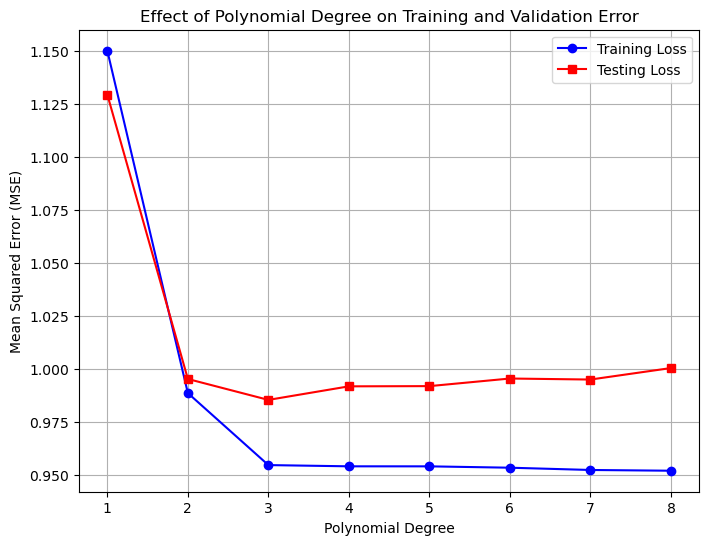

In [7]:
degrees = np.arange(1, 9)

loss_train_list, loss_test_list = polynomial_regression(poly_reg_df, degrees)

# TODO START:
# Plot the polynomial degrees (x-axis) against loss_train_list (y-axis) and loss_test_list (y-axis) in a single plot, with different colors.
# Make sure to include x and y axis labels, legend as well as the title
plt.figure(figsize=(8, 6))
plt.plot(degrees, loss_train_list, marker='o', linestyle='-', color='b', label='Training Loss')
plt.plot(degrees, loss_test_list, marker='s', linestyle='-', color='r', label='Testing Loss')

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of Polynomial Degree on Training and Validation Error')
plt.legend()
plt.grid(True)
plt.show()
# TODO END